In [1]:
import sys, os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools
from time import sleep

from tensorflow.keras.models import load_model, model_from_json
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D, MaxPool2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.utils import np_utils
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

C:\Apps\anaconda3\envs\usabcheckEnv2\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.3) or chardet (2.0.3) doesn't match a supported version!
  RequestsDependencyWarning)
Using TensorFlow backend.


In [19]:
numClasses = 7
batchSize = 32
imageRows, imageCols = 48, 48

# trainDataFolder = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/FER2013/Images/Training'
# validDataFolder = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/FER2013/Images/PublicTest'
testDataFolder = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/JAFFE/JustFace'

# Generates new images from the existing sample to increase the number of images
# This increases the accuracy. The generated images are the original that have been
# rescaled, shifted, rotated, flipped etc.
# Can generate 7 images from the original one
# """ ---------------------------------------------------------------
#     Create Data Generators
# --------------------------------------------------------------- """
# trainingDataGenerator = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=30,
#     shear_range=0.3,
#     zoom_range=0.3,
#     width_shift_range=0.4,
#     height_shift_range=0.4,
#     horizontal_flip=True,
#     fill_mode='nearest')

testDataGenerator = ImageDataGenerator(rescale=1./255)
# validDataGenerator = ImageDataGenerator(rescale=1./255)

# """ ---------------------------------------------------------------
#     Configure the generators to get data from directory
# --------------------------------------------------------------- """ 
# trainingGen = trainingDataGenerator.flow_from_directory(
#     trainDataFolder,
#     color_mode='grayscale',
#     target_size=(imageRows,imageCols),
#     batch_size=batchSize,
#     class_mode='categorical',
#     shuffle=True)

testGen = testDataGenerator.flow_from_directory(
    testDataFolder,
    color_mode='grayscale',
    target_size=(imageRows,imageCols),
    batch_size=batchSize,
    class_mode='categorical',
    shuffle=True)

# validGen = validDataGenerator.flow_from_directory(
#     validDataFolder,
#     color_mode='grayscale',
#     target_size=(imageRows,imageCols),
#     batch_size=batchSize,
#     class_mode='categorical',
#     shuffle=True)


Found 213 images belonging to 7 classes.


C:\Apps\anaconda3\envs\usabcheckEnv2\lib\site-packages\keras_preprocessing\image\utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


In [20]:
model = load_model(r'C:\Users\New User\Desktop\Fourth Year\Usability_Testing_FYP\Src\Model1.h5')
# predictions = model.predict_generator(testGen, verbose=1, steps=213/32)

# print(predictions)

In [44]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    fig = plt.figure(num=None, figsize=(20, 30), dpi=80, facecolor='w', edgecolor='k')
    fig.add_subplot(9, 2, 1)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}
# [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]
[0, 1, 2, 3, 4, 5, 6]
(213,)
Confusion matrix, without normalization
[[30  0  0  0  0  0  0]
 [29  0  0  0  0  0  0]
 [32  0  0  0  0  0  0]
 [29  0  0  0  0  0  2]
 [27  0  0  0  0  0  3]
 [31  0  0  0  0  0  0]
 [24  0  0  0  0  0  6]]


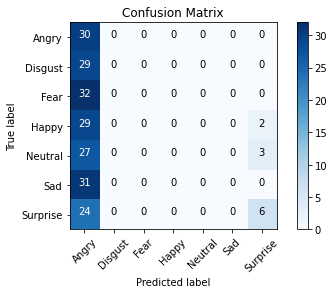

In [22]:
emotionsList = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
print(testGen.class_indices)
print("#", testGen.classes)
listClasses = []
for i in testGen.classes:
    if i not in listClasses:
        listClasses.append(i)
print(listClasses)
print(testGen.classes.shape)
        
cm = confusion_matrix(y_true=testGen.classes, y_pred=np.argmax(predictions, axis=-1))
plot_confusion_matrix(cm=cm, classes=emotionsList, title='Confusion Matrix')

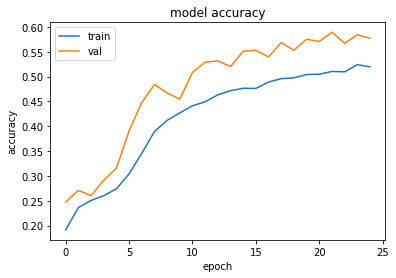

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

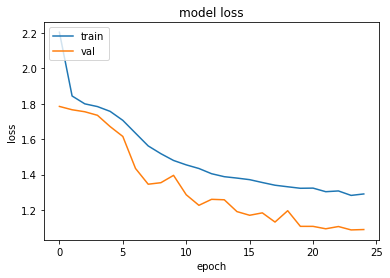

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

(213, 48, 48, 1)


ResourceExhaustedError:  OOM when allocating tensor with shape[32,32,48,48] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_1/conv2d_9/Conv2D (defined at <ipython-input-24-718409b6cb23>:37) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_predict_function_7902]

Function call stack:
predict_function


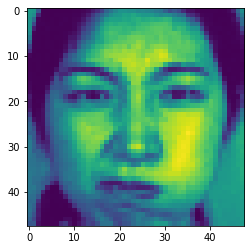

In [25]:
dataLabels = {
    "Angry": 0, "Disgust": 1, "Fear": 2, "Happy": 3, "Neutral": 4, "Sad": 5, "Surprise": 6 
}

def loadDataset(datasetDirectory):
    global dataLabels
    data = []
    labels = []
    
    emotionDirList = os.listdir(datasetDirectory)
    for folder in emotionDirList:
        # Folder exists but has not been selected so we ignore it
        if folder not in dataLabels.keys():
            continue
        
        label = dataLabels[folder]
        
        # Iterate over the images
        imageList = os.listdir(datasetDirectory + "/" + folder)
        for imgName in imageList:
            img = cv2.imread(datasetDirectory + '/'+ folder + '/'+ imgName)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            data.append(np.array(img.ravel(),'float32'))
            labels.append(label)
    
    return data, labels

emotionsList = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
testDataDir = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/JAFFE/JustFace'
X_test_ori, test_y = loadDataset(testDataDir)

X_test = np.array(X_test_ori)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)
print(X_test.shape)
plt.imshow(X_test[0])
predictions = model.predict(x=X_test)
# print(predictions)
# print(np.argmax(predictions))

# for img in X_test_ori:
# #     roi = img.astype('float')/255.0
#     print("original shape", img.shape)
# #     roi = img_to_array(img)
#     img.reshape(48, 48, 1)
#     roi = np.expand_dims(img, axis=0)
#     print("rois shape", roi.shape)
#     preds = model.predict(roi)[0]
#     print( preds.argmax())

cm = confusion_matrix(y_true = not_categorial_test_y, y_pred = np.argmax(predictions, axis=-1))
plot_confusion_matrix(cm=cm, classes=emotionsList, title='Confusion Matrix')

In [52]:
# datasetDirectory = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/JAFFE/Categorised'
# datasetDirectory = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/JAFFE/JustFace'
# datasetDirectory = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/FER2013/Images/PrivateTest'
datasetDirectory = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/FacesDB/JustFace'

dataLabels = {
    "Angry": 0, "Disgust": 1, "Fear": 2, "Happy": 3, "Neutral": 4, "Sad": 5, "Surprise": 6 
}

faceDetector = cv2.CascadeClassifier(r'haarcascade_frontalface_default.xml')


def makePredictions(datasetDirectory):
    global dataLabels
    
    predicted = []
    actual = []
    
    labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
        
    emotionDirList = os.listdir(datasetDirectory)
    for folder in emotionDirList:
        # Folder exists but has not been selected so we ignore it
        if folder not in dataLabels.keys():
            continue
        
        label = dataLabels[folder]
        
        # Iterate over the images
        imageList = os.listdir(datasetDirectory + "/" + folder)
        for imgName in imageList:
            img = cv2.imread(datasetDirectory + '/'+ folder + '/'+ imgName)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            gray = cv2.resize(gray, (48,48), interpolation=cv2.INTER_AREA)
            roi = gray.astype('float')/255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi,axis=0)
            preds = model.predict(roi)[0]
            predictedlabel = labels[preds.argmax()]
            
            predicted.append(preds.argmax())
            actual.append(label)
    
    return predicted, actual


predicted, actual = makePredictions(datasetDirectory)

# print(predicted)
# print(actual)

Confusion matrix, without normalization
[[15  0  0  3 11  7  0]
 [13  0  0 14  7  2  0]
 [ 3  0  8  8  5  1 11]
 [ 0  0  0 36  0  0  0]
 [ 0  0  0  1 31  4  0]
 [ 1  0  1  1 26  7  0]
 [ 0  0  5  6  1  0 24]]


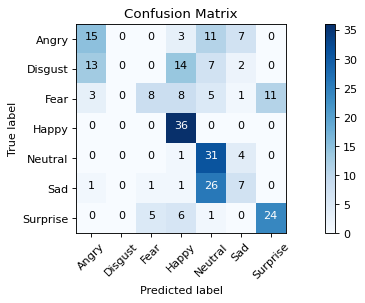

In [53]:
cm = confusion_matrix(y_true = actual, y_pred = predicted)
emotionList = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
plot_confusion_matrix(cm=cm, classes=emotionsList, title='Confusion Matrix')

In [51]:
datasetDirectory = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/FacesDB/Categorised'
destinationDirectory = 'C:/Users/New User/Desktop/Fourth Year/Usability_Testing_FYP/Datasets/FacesDB/JustFace'

dataLabels = {
    "Angry": 0, "Disgust": 1, "Fear": 2, "Happy": 3, "Neutral": 4, "Sad": 5, "Surprise": 6 
}

faceDetector = cv2.CascadeClassifier(r'haarcascade_frontalface_default.xml')

def extractFaceDataset(datasetDirectory, destinationDirectory):
    global dataLabels
    
    labels = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]
    predictCount = {}
        
    emotionDirList = os.listdir(datasetDirectory)
    for folder in emotionDirList:
        # Folder exists but has not been selected so we ignore it
        if folder not in dataLabels.keys():
            continue
        
        label = dataLabels[folder]
        
        # Iterate over the images
        imageList = os.listdir(datasetDirectory + "/" + folder)
        for imgName in imageList:
            img = cv2.imread(datasetDirectory + '/'+ folder + '/'+ imgName)
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            faces = faceDetector.detectMultiScale(gray, 1.3, 5)
            
            # Iterate over the faces (bounding boxes)
            for (x, y, w, h) in faces:
                croppedFace = gray[y:y+h, x:x+w]
                # Resize the face to the size the classifier expects (48 x 48)
                croppedFace = cv2.resize(croppedFace, (48,48), interpolation=cv2.INTER_AREA)

                # If a face has been detected and the image has pixel values
                if np.sum([croppedFace]) != 0:
                    outputDir = destinationDirectory + '/'+ folder + '/'+ imgName
                    cv2.imwrite(outputDir, croppedFace)

extractFaceDataset(datasetDirectory, destinationDirectory)